In [45]:
import numpy as np
from scipy.optimize import fsolve, root
import matplotlib.pyplot as plt


def phi_spinA(chi, N):
    phispinA = (1 + (-1 + 2 * chi) * N + np.sqrt(1 - 2 * (1 + 2 * chi) * N + (1 - 2 * chi)**2 * N**2)) / (4 * chi * N) 
    return phispinA

def phi_spinB(chi, N):
    phispinB = (1 + (-1 + 2 * chi) * N - np.sqrt(1 - 2 * (1 + 2 * chi) * N + (1 - 2 * chi)**2 * N**2)) / (4 * chi * N)
    return phispinB


def mu_calc(phi, chi, N):
    term1 = -1 + (1 / N) + chi
    term2 = (1 / N) * np.log(phi) - np.log(1 - phi)
    term3 = 2 * chi * phi    
    result = term1 + term2 - term3
    return result

    
def pi_calc(phi, chi, N):
    if phi <= 0 or phi >= 1:
        raise ValueError("phi must be between 0 and 1 (exclusive)", phi)
    result = -np.log(1 - phi) - chi * phi**2 + phi * (1/N -1)
    return result

def my_func(vars, paras):
    #xA , xB = np.real(vars)
    xA , xB = vars
    
    chi , N = paras
    phiSA = phi_spinA(chi, N)
    phiSB = phi_spinB(chi, N)
    phiA = phiSA + ((1 - phiSA) * np.exp(xA))/(1 + np.exp(xA))
    phiB = phiSB * ((np.exp(xB))/(1 + np.exp(xB)))
    return (
        (mu_calc(phiA, chi, N) - mu_calc(phiB, chi, N)),
        (pi_calc(phiA, chi, N) - pi_calc(phiB, chi, N))
    )





In [59]:
# Define the range for chi and fix N
N_values = [1000.0] # Fixed value for N
chiC = 0.5 * (1 + (1/np.sqrt(N_values[0])))**2
chi_values = np.linspace((chiC * 1.001), 1, 500)

N=N_values[0]
phiC = 1 / (1 + np.sqrt(N))
chiC = 0.5 * (1 + (1/np.sqrt(N)))**2

#Create guess
phiAg=phiC+np.sqrt(3*(chi_values[0]-chiC)/(2*chiC**2*np.sqrt(N)))
phiBg=phiC-np.sqrt(3*(chi_values[0]-chiC)/(2*chiC**2*np.sqrt(N)))
phiSA = phi_spinA(chi_values[0], N)
phiSB = phi_spinB(chi_values[0], N)

#Convert to xA and xB guesses
xAguess=-np.log((1-phiSA)/(phiAg-phiSA)-1)
xBguess=-np.log(phiSB/phiBg-1)

# Initial guess
initial_guess = [xAguess, xBguess]

# Lists to store solutions
phiA_solutions = []
phiB_solutions = []



for chi in chi_values:
    for N in N_values:
        #print(initial_guess)
        paras = [chi, N]
        solution = root(my_func, initial_guess, args=(paras,), method='hybr', options={'xtol':1e-16})
        xA, xB = np.real(solution.x)
        phiSA = phi_spinA(chi, N)
        phiSB = phi_spinB(chi, N)
        phiA = phiSA + ((1 - phiSA) * ((np.exp(xA))/(1 + np.exp(xA))))
        phiB = phiSB * ((np.exp(xB))/(1 + np.exp(xB))) 
        phiA_solutions.append(phiA)
        phiB_solutions.append(phiB)
        initial_guess = solution.x
       # print(xB)




# Convert lists to arrays for easier plotting
phiA_solutions = np.array(phiA_solutions)
phiB_solutions = np.array(phiB_solutions)

#print(phiA_solutions.shape)
#print(phiB_solutions.shape)
#print(chi_values.shape)



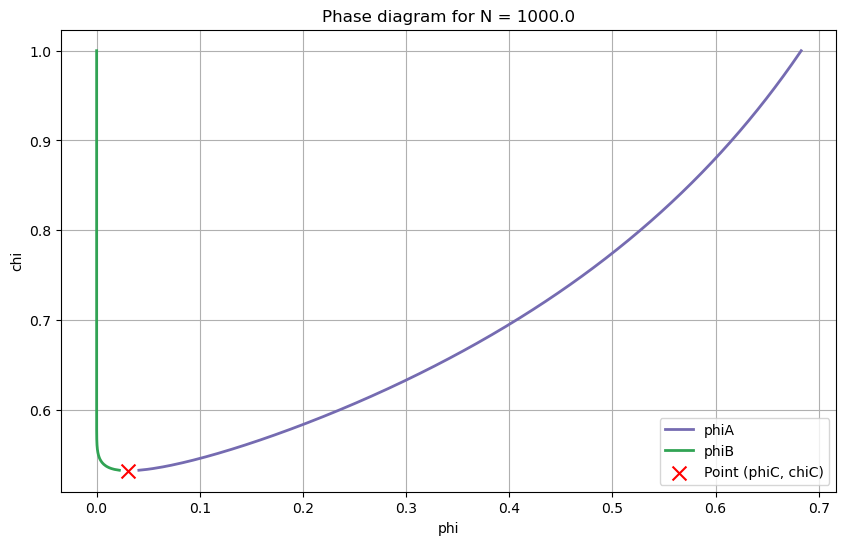

In [60]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(phiA_solutions, chi_values, label='phiA', color='#756bb1', linestyle='-', linewidth=2, markersize=5)
plt.plot(phiB_solutions, chi_values, label='phiB', color='#31a354', linestyle='-', linewidth=2, markersize=5)
plt.scatter(phiC, chiC, color='red', label='Point (phiC, chiC)', s=100, marker='x')
plt.xlabel('phi')
plt.ylabel('chi')
plt.title('Phase diagram for N = {}'.format(N))
plt.legend()
plt.grid(True)
plt.show()

#print(phiC, chiC)